# Thực nghiệm thuật toán Decision Tree trên tập dataset 1

<h2> Table of content </h2>
<div class ="alert alert-block alert-info" style="margin-top: 20px">
  <ol>
    <li><a href = "#1"> Tạo tập dữ liệu </a></li>
    <li><a href = "#2"> Thử nghiệm mô hình mặc định </a></li>
    <li><a href = "#tuning"> Tinh chỉnh siêu tham số  </a></li>
  </ol>
</div>

<h3 id = "1"> 1. Tạo tập dữ liệu </h3>

In [19]:
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [13]:
data_train = pd.read_csv("Data1_train.csv")
data_test = pd.read_csv("Data1_test.csv")
drop_columns = data_train.columns[:2]  #drop column "Unnamed", "ID"

data_train.drop(axis = 1, columns = drop_columns, inplace=True)
data_test.drop(axis = 1, columns = drop_columns, inplace=True)

data_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,3,5,178,3,1,0,7,4135,0
1,0,2,6,3,202,4,2,0,3,4496,1
2,3,2,2,5,277,3,2,1,6,1032,0
3,2,2,5,5,219,2,2,1,4,4289,0
4,2,0,6,3,296,4,1,0,4,1650,0


Dữ liệu cần dự đoán ở đây là cột Reach.on.Time_Y.N

In [14]:
X_train = data_train.iloc[:, data_train.columns != "Reached.on.Time_Y.N"].values
y_train = data_train["Reached.on.Time_Y.N"].values

X_test = data_test.iloc[:, data_test.columns != "Reached.on.Time_Y.N"].values
y_test = data_test["Reached.on.Time_Y.N"].values

<h3 id = "2"> 2. Thử nghiệm mô hình mặc định </h3>

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



<h3 id = "tuning"> 3. Tinh chỉnh siêu tham số </h3>

Em tinh chỉnh các siêu tham số sau

<li> <b>max_depth </b>: Đây là số lượng tối đa của các nút trong cây quyết định. Tăng giá trị của max_depth có thể làm tăng khả năng mô hình học được các mối quan hệ phức tạp hơn trong dữ liệu, nhưng cũng có thể dẫn đến overfitting.

<li> <b>min_samples_split </b>:  Đây là số lượng mẫu tối thiểu yêu cầu để một nút có thể tiếp tục được chia thành các nút con. Giảm giá trị min_samples_split có thể làm tăng độ phức tạp của cây và có thể dẫn đến overfitting. 

<li> <b>min_samples_leaf </b>: Đây là số lượng mẫu tối thiểu yêu cầu trong mỗi lá của cây quyết định. Tương tự như min_samples_split, giảm giá trị min_samples_leaf có thể làm tăng độ phức tạp của cây, trong khi tăng giá trị có thể dẫn đến underfitting.

<li> <b> criterion </b>: Decision Tree Classifier có thể sử dụng các tiêu chí khác nhau để đo lường chất lượng chia nhánh, ví dụ như "gini" hoặc "entropy". Thông thường, không có một tiêu chí nào tốt hơn mà phù hợp cho tất cả các bài toán, nên em thể thử nghiệm cả hai để xem cái nào hoạt động tốt nhất.

Siêu tham số được tinh chỉnh bằng phương pháp đánh giá chéo (cross validaition) với việc tập dữ liệu được chia làm 10 phần không chồng chéo và có kích thước bằng nhau. 
Ngoài ra thước đo cho mô hình em chọn là F1 - score

In [40]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(model, hyperparameters, cv=10, scoring= 'f1_micro')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [39]:
model = DecisionTreeClassifier(criterion= "entropy", max_depth = 5, min_samples_leaf = 5, min_samples_split = 2)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.57      0.92      0.70       895
           1       0.91      0.52      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.72      0.68      2200
weighted avg       0.77      0.69      0.68      2200



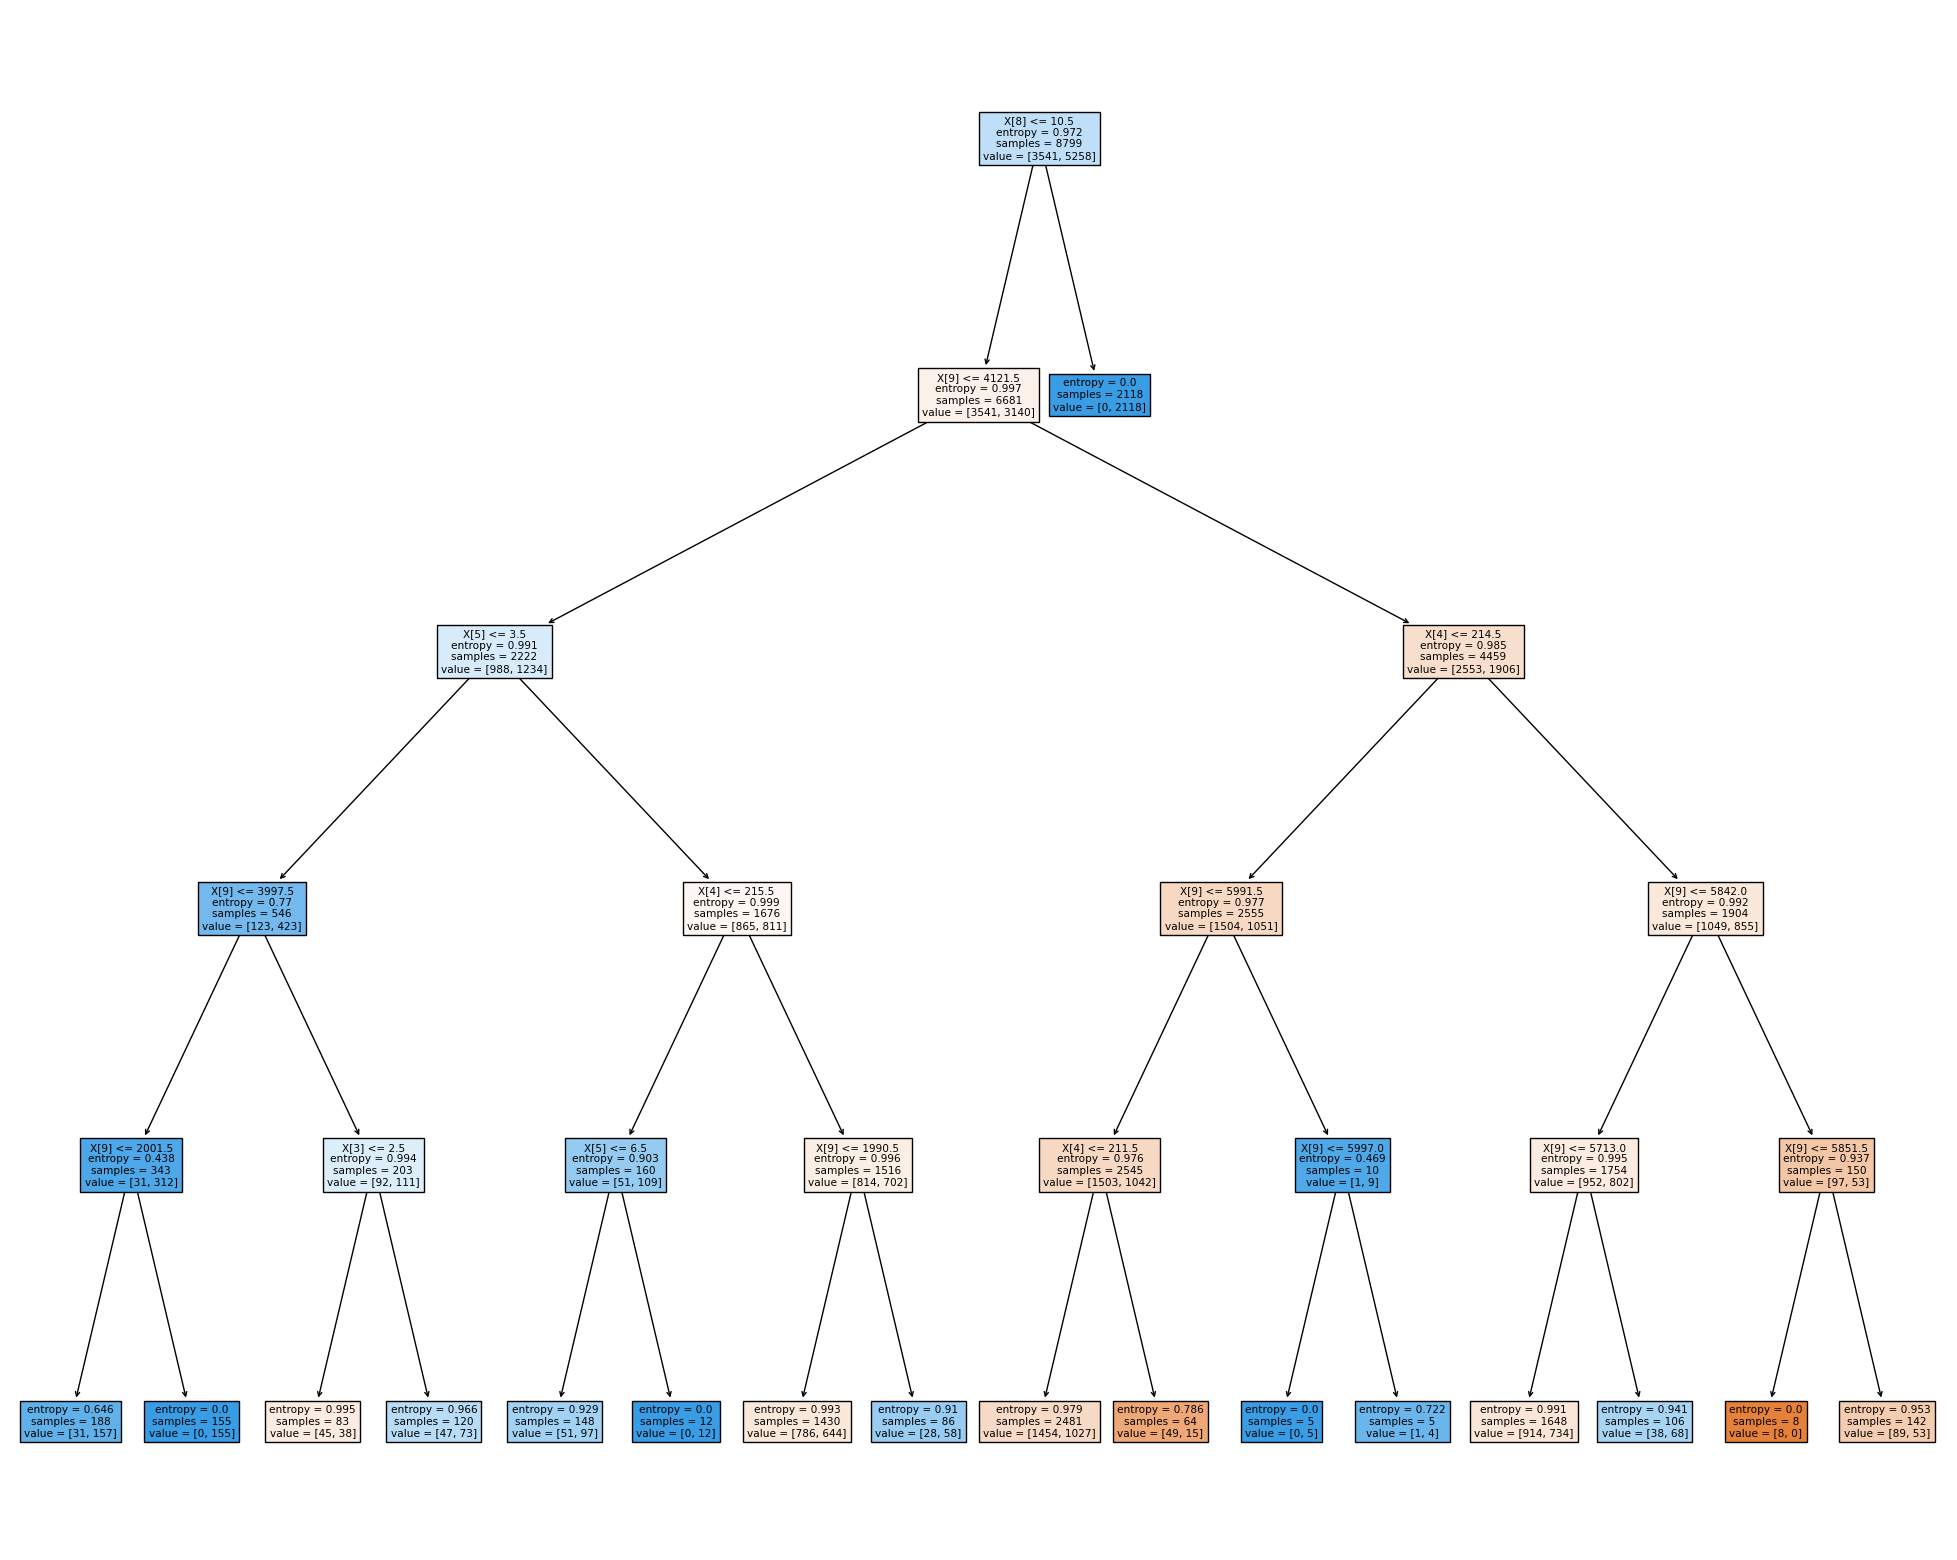

In [43]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, filled=True)
fig.savefig("decistion_tree_1.png")